In [3]:
import tensorflow as tf
import tensorflow.keras as K
import tensorflow.keras.layers as L
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer 

In [29]:
class TrainingConfig():
    epochs = 5
    batch_size= 128
    learningRate=0.001
    valRate=0.1
    loss=['sparse_categorical_crossentropy']
    metrics=['accuracy']
    optimizer='adam'
    
class WordEmbedding():
    sequenceLength=256
    wordCount=10000
    wordDim=10

class DataSourceConfig():
    source=["./dataset/imdb_train_data.npy",
           "./dataset/imdb_test_data.npy",
           "./dataset/imdb_train_labels.npy",
           "./dataset/imdb_test_labels.npy"]

In [56]:
class TextRNN():
    def __init__(self,config,wordEmbedding):
        
        self.model = None
        self.history = None
        self.config=config
        self.emb=wordEmbedding
        self.name="TextRNN"
      
    
    def design_model(self,hiden_size=32,with_fc=False):
        input_layer=L.Input(shape=(None,),name='feature_input')
        x=L.Embedding(input_dim=self.emb.wordCount,output_dim=self.emb.wordDim,input_length=self.emb.sequenceLength)(input_layer)
        x=L.LSTM(hiden_size,dropout=0.4)(x)
        if with_fc:
            x=L.Dense(hiden_size,activation='relu')(x)
        output_layer=L.Dense(2,activation='softmax')(x)
        model=K.models.Model(inputs=[input_layer],outputs=[output_layer],name=self.name)
        self.model=model
        model.summary()
        return model
    
    
    def design_model_with_bilstm(self,hiden_size=32,with_fc=False):
        input_layer=L.Input(shape=(None,),name='feature_input')
        x=L.Embedding(input_dim=self.emb.wordCount,output_dim=self.emb.wordDim,input_length=self.emb.sequenceLength)(input_layer)
        x=L.Bidirectional(L.LSTM(hiden_size,dropout=0.4))(x)
        if with_fc:
            x=L.Dense(hiden_size,activation='relu')(x)
        output_layer=L.Dense(2,activation='softmax')(x)
        model=K.models.Model(inputs=[input_layer],outputs=[output_layer],name=self.name)
        self.model=model
        model.summary()
        return model
        
    
    def compile_model(self):
        #assert()
        if not self.model:
            print("Call design_modelXX() to build the model first.")
            return
        self.model.compile(optimizer=self.config.optimizer,loss=self.config.loss,metrics=self.config.metrics)

    def train_model(self,x,y):
        if not self.model:
            print("Call design_modelXX() to build the model first.")
            return
        self.compile_model()
        self.history=self.model.fit(x=x,y=y,batch_size=self.config.batch_size,epochs=self.config.epochs,validation_split=self.config.valRate)
        #self.model.compile()
    
    def save_model(self):
        if not self.model:
            print("Call design_modelXX() to build the model first.")
        pass
    
    def eval_model(self):
        if not self.model:
            print("Call design_modelXX() to build the model first.")
        pass
    
    def view_train(self):
        if not self.history:
            print("Model has not been trained, train it first")
            return
        
        train=self.history.history["loss"]
        valid=self.history.history["val_loss"]
        name='loss'
        plt.title('The %s with epoch runs'%name,fontsize=30)
        plt.xlabel('epoch',fontsize=20)
        plt.ylabel(name,fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.plot(train,label=name)
        plt.plot(valid,label="val_"+name)
        plt.legend()
        plt.gcf().set_size_inches(15,4)
        plt.show()
    #model=K.models.Model(inputs=[input_layer],outputs=[output_layer])
    #model.compile('adam',loss='categorical_crossentropy',metrics=metrics)
    #return model

In [57]:
train_config=TrainingConfig()
word_embedding=WordEmbedding()
model=TextRNN(train_config,word_embedding)

In [58]:
model.design_model_with_bilstm(with_fc=True)

Model: "TextRNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_input (InputLayer)   [(None, None)]            0         
_________________________________________________________________
embedding_9 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                11008     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 66        
Total params: 113,154
Trainable params: 113,154
Non-trainable params: 0
_________________________________________________________________


In [59]:
class Dataset():
    def __init__(self,config):
        self.config=config
    def load(self):
        L=[]
        for item in self.config.source:
            L.append(np.load(item,allow_pickle=True, fix_imports=True))
        return L

In [60]:
data=Dataset(DataSourceConfig)
train_data,test_data,train_labels,test_labels=data.load()

In [61]:
model.train_model(x=train_data,y=train_labels)

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 8s 372us/sample - loss: 0.6087 - accuracy: 0.6340 - val_loss: 0.4298 - val_accuracy: 0.8112
Epoch 2/10
22500/22500 [==============================] - 6s 257us/sample - loss: 0.3312 - accuracy: 0.8667 - val_loss: 0.3276 - val_accuracy: 0.8704
Epoch 3/10
22500/22500 [==============================] - 7s 309us/sample - loss: 0.2445 - accuracy: 0.9079 - val_loss: 0.3193 - val_accuracy: 0.8688
Epoch 4/10
22500/22500 [==============================] - 6s 251us/sample - loss: 0.2094 - accuracy: 0.9226 - val_loss: 0.2946 - val_accuracy: 0.8924
Epoch 5/10
22500/22500 [==============================] - 6s 283us/sample - loss: 0.1668 - accuracy: 0.9395 - val_loss: 0.3181 - val_accuracy: 0.8896
Epoch 6/10
22500/22500 [==============================] - 6s 279us/sample - loss: 0.1525 - accuracy: 0.9455 - val_loss: 0.3536 - val_accuracy: 0.8812
Epoch 7/10
22500/22500 [===========================

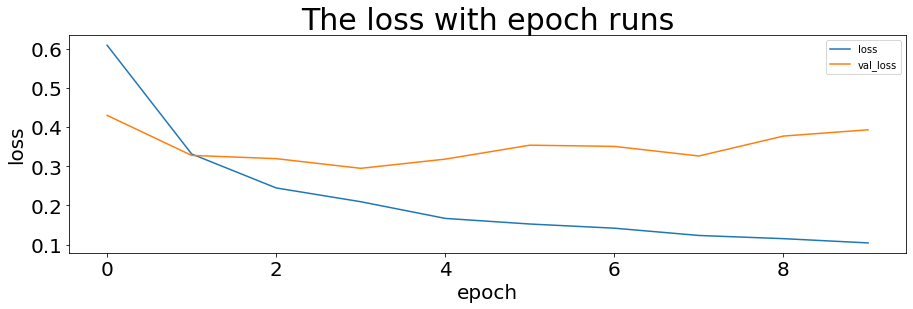

In [62]:
model.view_train()